In [ ]:
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install descartes 
!pip install folium matplotlib mapclassify
!pip3 install contextily

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 1s (2,799 kB/s)
Se

In [ ]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
!pip install --upgrade geopandas plotly
import geopandas as gpd
import plotly.express as px
import folium
from shapely.geometry import Point
import contextily as cx


     |████████████████████████████████| 1.0 MB 18.6 MB/s 
     |████████████████████████████████| 28.8 MB 157 kB/s 
     |████████████████████████████████| 6.3 MB 47.4 MB/s 
     |████████████████████████████████| 16.7 MB 28.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [94]:
path = 'dorian_month.csv'
df_dorian = pd.read_csv(path, index_col=0)

In [95]:
df_dorian.head(2)

,station,fecha,latitude,longitude,elevation,name,report_type,source,sunrise,sunset,...,dailyaveragewetbulbtemperature,dailyaveragewindspeed,dailymaximumdrybulbtemperature,dailyminimumdrybulbtemperature,dailypeakwinddirection,dailypeakwindspeed,dailyprecipitation,dailysustainedwinddirection,dailysustainedwindspeed,fecha_corta
0,72781524237,2019-08-16 23:59:00,47.2767,-121.3372,1206.7,"STAMPEDE PASS, WA US",SOD,6,503.0,1915.0,...,51.0,5.9,61.0,50.0,230.0,17.0,0.0,230.0,9.0,2019-08-16
1,72781524237,2019-08-17 23:59:00,47.2767,-121.3372,1206.7,"STAMPEDE PASS, WA US",SOD,6,504.0,1914.0,...,50.0,5.3,57.0,48.0,270.0,20.0,0.0,270.0,11.0,2019-08-17


In [96]:
gdf_dorian = gpd.GeoDataFrame(
    df_dorian, geometry= gpd.points_from_xy(df_dorian.longitude, df_dorian.latitude))

In [97]:
gdf_dorian.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 14008 entries, 0 to 14007
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   station                          14008 non-null  int64   
 1   fecha                            14008 non-null  object  
 2   latitude                         14008 non-null  float64 
 3   longitude                        14008 non-null  float64 
 4   elevation                        14008 non-null  float64 
 5   name                             14008 non-null  object  
 6   report_type                      14008 non-null  object  
 7   source                           14008 non-null  int64   
 8   sunrise                          14008 non-null  float64 
 9   sunset                           14008 non-null  float64 
 10  dailyaveragedewpointtemperature  13927 non-null  float64 
 11  dailyaveragedrybulbtemperature   13965 non-null  float64 
 

/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


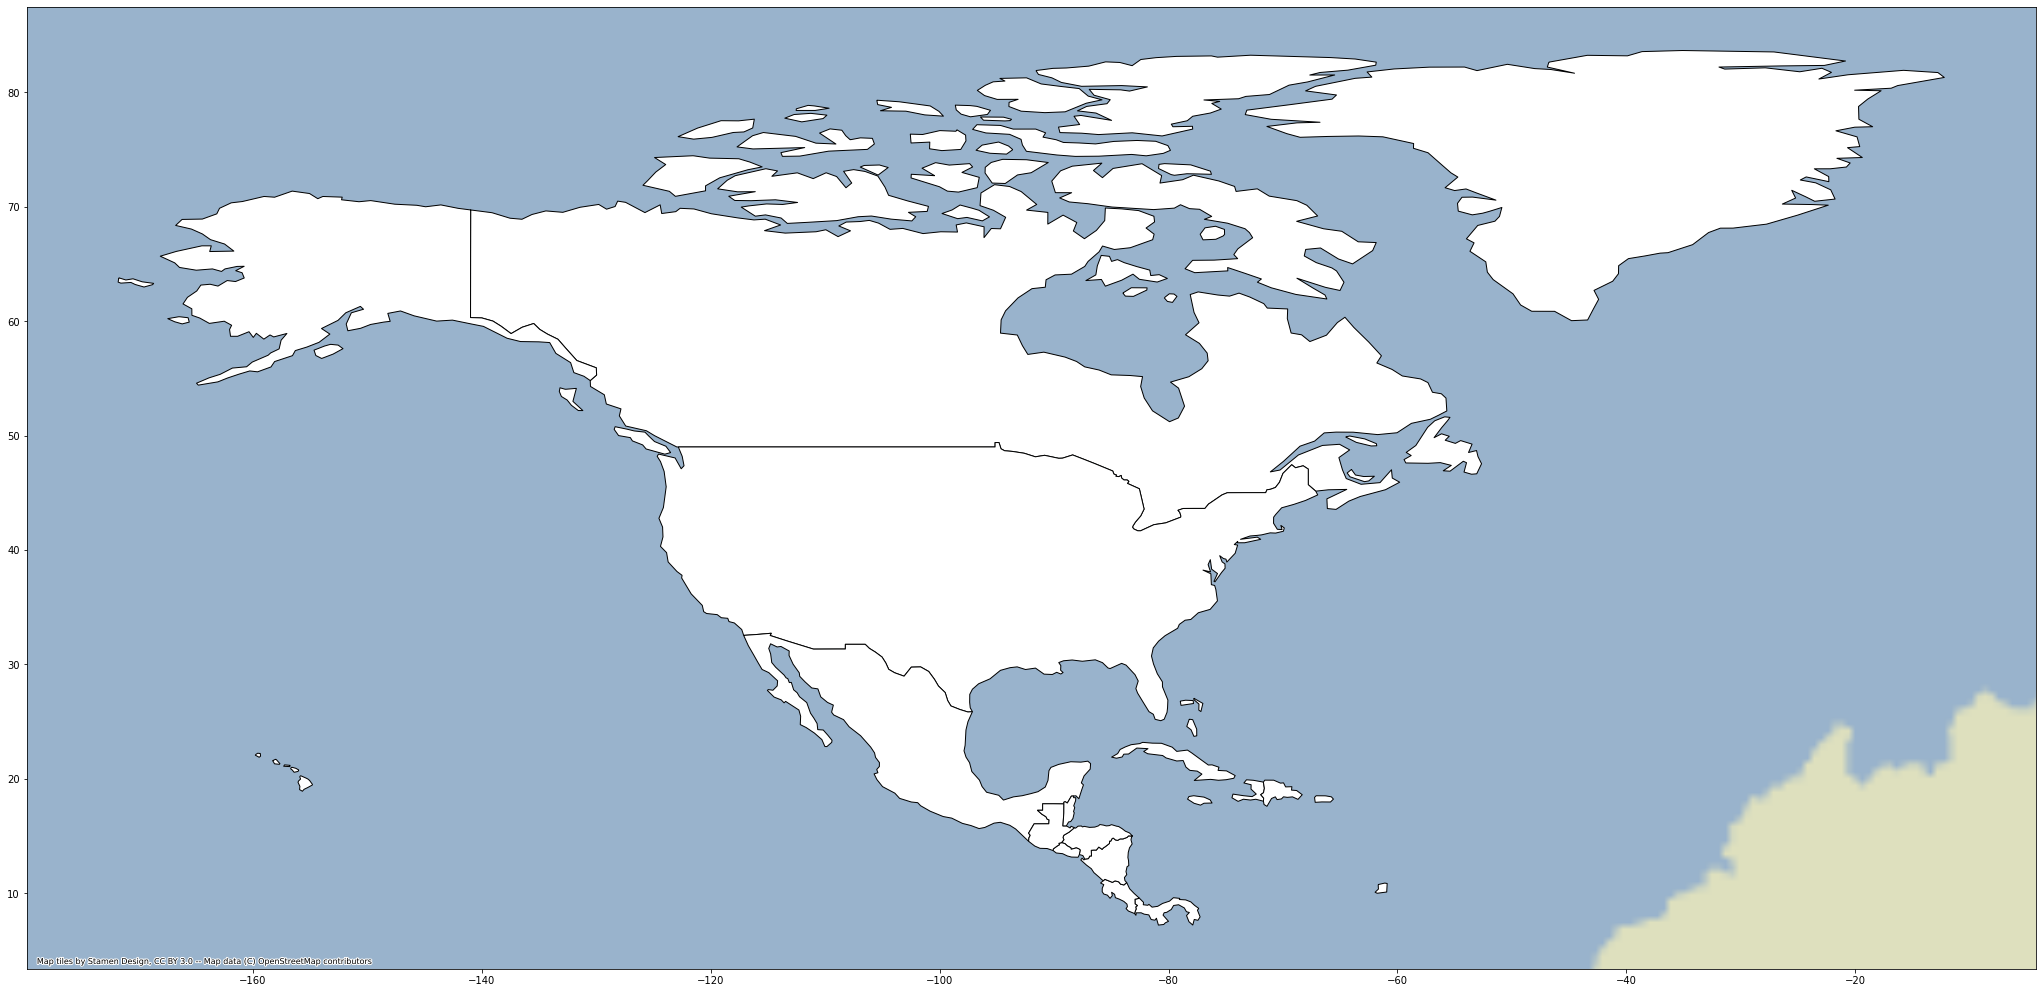

In [93]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black', figsize=(36,24))
cx.add_basemap(ax)
plt.show()

In [ ]:
!unzip us.zip

Archive:  us.zip
 extracting: data/1950-2018-torn-aspath.zip  
 extracting: data/1950-2018-torn-initpoint.zip  
 extracting: data/usa-states-census-2014.cpg  
  inflating: data/usa-states-census-2014.dbf  
  inflating: data/usa-states-census-2014.prj  
  inflating: data/usa-states-census-2014.qpj  
  inflating: data/usa-states-census-2014.shp  
  inflating: data/usa-states-census-2014.shp.xml  
  inflating: data/usa-states-census-2014.shx  


In [ ]:
!ls data

1950-2018-torn-aspath.zip     usa-states-census-2014.qpj
1950-2018-torn-initpoint.zip  usa-states-census-2014.shp
usa-states-census-2014.cpg    usa-states-census-2014.shp.xml
usa-states-census-2014.dbf    usa-states-census-2014.shx
usa-states-census-2014.prj


In [ ]:
states = gpd.read_file('data/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

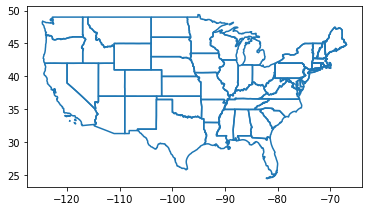

In [ ]:
states.boundary.plot()

In [ ]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


In [99]:
gdf_j = states.sjoin(gdf_dorian, how="inner")
gdf_j.info()

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1938: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 13828 entries, 0 to 57
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   STATEFP                          13828 non-null  object  
 1   STATENS                          13828 non-null  object  
 2   AFFGEOID                         13828 non-null  object  
 3   GEOID                            13828 non-null  object  
 4   STUSPS                           13828 non-null  object  
 5   NAME                             13828 non-null  object  
 6   LSAD                             13828 non-null  object  
 7   ALAND                            13828 non-null  int64   
 8   AWATER                           13828 non-null  int64   
 9   region                           13828 non-null  object  
 10  geometry                         13828 non-null  geometry
 11  index_right                      13828 non-null  int64   
 12 

In [102]:
df_avgs = gdf_j.groupby(['fecha_corta', 'GEOID']).mean().reset_index()
df_avgs.drop(columns=['ALAND', 'AWATER'], inplace=True)
df_avgs.head()

,fecha_corta,GEOID,index_right,station,latitude,longitude,elevation,source,sunrise,sunset,...,dailyaveragestationpressure,dailyaveragewetbulbtemperature,dailyaveragewindspeed,dailymaximumdrybulbtemperature,dailyminimumdrybulbtemperature,dailypeakwinddirection,dailypeakwindspeed,dailyprecipitation,dailysustainedwinddirection,dailysustainedwindspeed
0,2019-08-16,01,7559.666667,7.224865e+10,33.026213,-86.832003,131.377778,6.0,510.777778,1831.777778,...,29.507778,70.888889,3.400000,97.000000,67.888889,195.555556,17.777778,0.000000,298.888889,13.222222
1,2019-08-16,04,10843.666667,7.232388e+10,33.741200,-111.480867,1171.950000,6.0,548.333333,1911.333333,...,26.123333,59.166667,8.000000,100.166667,69.166667,238.333333,29.333333,0.000000,216.666667,22.833333
2,2019-08-16,05,8018.700000,7.250916e+10,34.553660,-93.352366,177.610000,6.0,534.900000,1884.200000,...,29.330000,73.700000,3.840000,94.300000,69.800000,168.888889,238.400000,0.000000,176.900000,11.600000
3,2019-08-16,06,10925.645161,7.252548e+10,36.652629,-120.005803,292.893548,6.0,516.677419,1860.354839,...,28.864194,62.419355,7.293548,94.516129,65.774194,246.129032,22.419355,0.000000,248.064516,17.322581
4,2019-08-16,08,9487.571429,7.248958e+10,38.647633,-106.456619,1801.557143,6.0,520.428571,1882.000000,...,24.191429,54.285714,8.261538,92.857143,52.428571,262.857143,39.714286,0.001111,238.571429,29.214286


In [103]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   58 non-null     object  
 1   STATENS   58 non-null     object  
 2   AFFGEOID  58 non-null     object  
 3   GEOID     58 non-null     object  
 4   STUSPS    58 non-null     object  
 5   NAME      58 non-null     object  
 6   LSAD      58 non-null     object  
 7   ALAND     58 non-null     int64   
 8   AWATER    58 non-null     int64   
 9   region    58 non-null     object  
 10  geometry  58 non-null     geometry
dtypes: geometry(1), int64(2), object(8)
memory usage: 5.1+ KB


In [105]:
gdf_final = states.merge(df_avgs, on='GEOID', how='inner')
gdf_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1740 entries, 0 to 1739
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   STATEFP                          1740 non-null   object  
 1   STATENS                          1740 non-null   object  
 2   AFFGEOID                         1740 non-null   object  
 3   GEOID                            1740 non-null   object  
 4   STUSPS                           1740 non-null   object  
 5   NAME                             1740 non-null   object  
 6   LSAD                             1740 non-null   object  
 7   ALAND                            1740 non-null   int64   
 8   AWATER                           1740 non-null   int64   
 9   region                           1740 non-null   object  
 10  geometry                         1740 non-null   geometry
 11  fecha_corta                      1740 non-null   object  
 12

In [68]:
df_dorian_h = pd.read_csv("h_dorian.csv")
df_dorian_h.head(2)

,Unnamed: 0,num,id,name,anio,fecha,record_identifier,status_of_system,latitude,longitude,maximum_sustained_wind,maximum_pressure
0,0,6320,205,DORIAN,2019,2019-08-24 06:00:00,NaN,TD,10.3,-46.4,25.0,1011.0
1,1,6321,205,DORIAN,2019,2019-08-24 12:00:00,NaN,TD,10.4,-47.5,30.0,1010.0


In [70]:
gdf_dorian_h = gpd.GeoDataFrame(
  df_dorian_h,
  geometry= gpd.points_from_xy(df_dorian_h.longitude, df_dorian_h.latitude)
)

In [112]:
gdf_dorian_h["fecha_corta"] = pd.to_datetime(gdf_dorian_h['fecha']).dt.date
gdf_dorian_h.head()

,Unnamed: 0,num,id,name,anio,fecha,record_identifier,status_of_system,latitude,longitude,maximum_sustained_wind,maximum_pressure,geometry,fecha_corta
0,0,6320,205,DORIAN,2019,2019-08-24 06:00:00,NaN,TD,10.3,-46.4,25.0,1011.0,POINT (-46.40000 10.30000),2019-08-24
1,1,6321,205,DORIAN,2019,2019-08-24 12:00:00,NaN,TD,10.4,-47.5,30.0,1010.0,POINT (-47.50000 10.40000),2019-08-24
2,2,6322,205,DORIAN,2019,2019-08-24 18:00:00,NaN,TS,10.6,-48.7,35.0,1008.0,POINT (-48.70000 10.60000),2019-08-24
3,3,6323,205,DORIAN,2019,2019-08-25 00:00:00,NaN,TS,10.8,-49.9,35.0,1008.0,POINT (-49.90000 10.80000),2019-08-25
4,4,6324,205,DORIAN,2019,2019-08-25 06:00:00,NaN,TS,11.0,-51.0,35.0,1008.0,POINT (-51.00000 11.00000),2019-08-25


In [113]:
gdf_dorian.head()

,station,fecha,latitude,longitude,elevation,name,report_type,source,sunrise,sunset,...,dailyaveragewindspeed,dailymaximumdrybulbtemperature,dailyminimumdrybulbtemperature,dailypeakwinddirection,dailypeakwindspeed,dailyprecipitation,dailysustainedwinddirection,dailysustainedwindspeed,fecha_corta,geometry
0,72781524237,2019-08-16 23:59:00,47.2767,-121.3372,1206.7,"STAMPEDE PASS, WA US",SOD,6,503.0,1915.0,...,5.9,61.0,50.0,230.0,17.0,0.0,230.0,9.0,2019-08-16,POINT (-121.33720 47.27670)
1,72781524237,2019-08-17 23:59:00,47.2767,-121.3372,1206.7,"STAMPEDE PASS, WA US",SOD,6,504.0,1914.0,...,5.3,57.0,48.0,270.0,20.0,0.0,270.0,11.0,2019-08-17,POINT (-121.33720 47.27670)
2,72781524237,2019-08-18 23:59:00,47.2767,-121.3372,1206.7,"STAMPEDE PASS, WA US",SOD,6,506.0,1912.0,...,5.8,67.0,50.0,230.0,17.0,0.0,230.0,8.0,2019-08-18,POINT (-121.33720 47.27670)
3,72781524237,2019-08-19 23:59:00,47.2767,-121.3372,1206.7,"STAMPEDE PASS, WA US",SOD,6,507.0,1910.0,...,4.6,68.0,50.0,NaN,NaN,0.0,230.0,7.0,2019-08-19,POINT (-121.33720 47.27670)
4,72781524237,2019-08-20 23:59:00,47.2767,-121.3372,1206.7,"STAMPEDE PASS, WA US",SOD,6,508.0,1908.0,...,3.3,79.0,54.0,NaN,NaN,0.0,230.0,7.0,2019-08-20,POINT (-121.33720 47.27670)


In [159]:
from datetime import date,timedelta

In [177]:
def graph_day(day: date):
  day_str = day.strftime("%Y-%m-%d")
  ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black', figsize=(36,24))
  gdf_final[gdf_final["fecha_corta"] == day].plot(column="dailyaveragedewpointtemperature", cmap='YlOrRd', ax=ax)
  ax.axis('off')
  cx.add_basemap(ax)
  df_hurr = gdf_dorian_h[gdf_dorian_h["fecha_corta"] <=  day]
  df_rain = gdf_dorian[gdf_dorian["fecha_corta"] ==  day_str]
  df_hurr.plot(markersize=df_hurr['maximum_sustained_wind']*5, ax=ax, alpha=0.6, color="green")
  df_rain.plot(markersize=df_rain['dailyprecipitation']*150, ax=ax, alpha=0.6, color="blue")
  return ax


/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


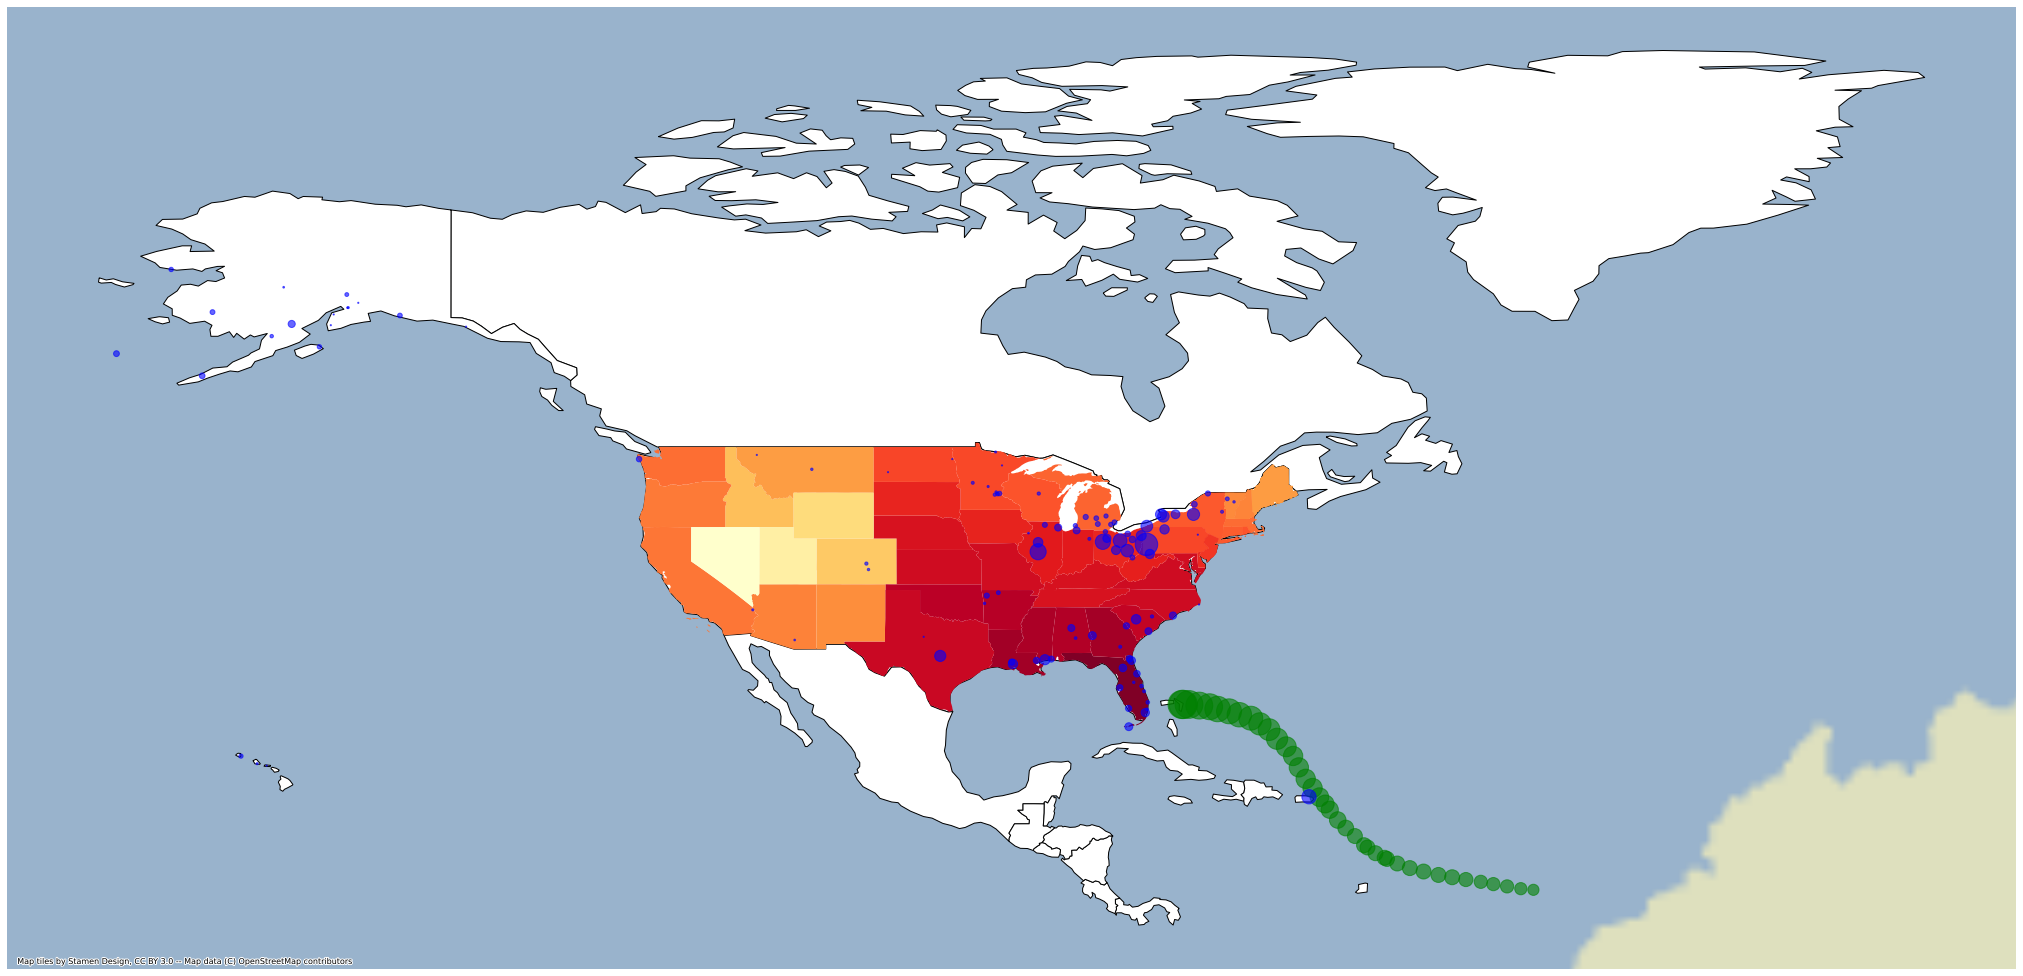

In [178]:
graph_day(date(2019,9,1)) #2019-09-01

In [147]:
len(gdf_dorian_h.groupby("fecha_corta").max().index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  """Entry point for launching an IPython kernel.


17

In [164]:
gdf_final["fecha_corta"] = pd.to_datetime(gdf_final['fecha_corta']).dt.date


In [179]:
!mkdir frames

In [180]:
initial = gdf_final["fecha_corta"].min()
last = gdf_final["fecha_corta"].max()
for i in range((last - initial).days + 1):
  ax = graph_day(initial + timedelta(days=i))
  ax.figure.savefig(f'frames/{i}.png')

Output hidden; open in https://colab.research.google.com to view.

In [171]:
initial + timedelta(days=i)

datetime.date(2019, 8, 16)

In [181]:
import cv2
import glob
img_array = []
filenames = [f"frames/{i}.png" for i in range(0,30)]
filenames

['frames/0.png',
 'frames/1.png',
 'frames/2.png',
 'frames/3.png',
 'frames/4.png',
 'frames/5.png',
 'frames/6.png',
 'frames/7.png',
 'frames/8.png',
 'frames/9.png',
 'frames/10.png',
 'frames/11.png',
 'frames/12.png',
 'frames/13.png',
 'frames/14.png',
 'frames/15.png',
 'frames/16.png',
 'frames/17.png',
 'frames/18.png',
 'frames/19.png',
 'frames/20.png',
 'frames/21.png',
 'frames/22.png',
 'frames/23.png',
 'frames/24.png',
 'frames/25.png',
 'frames/26.png',
 'frames/27.png',
 'frames/28.png',
 'frames/29.png']

In [ ]:
324, 380
2333, 1340

In [186]:
for filename in filenames:
    print(filename)
    img = cv2.imread(filename)
    img = img[380:1340, 324:2333]
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter("dorian.mp4", fourcc, 5, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()
size

frames/0.png
frames/1.png
frames/2.png
frames/3.png
frames/4.png
frames/5.png
frames/6.png
frames/7.png
frames/8.png
frames/9.png
frames/10.png
frames/11.png
frames/12.png
frames/13.png
frames/14.png
frames/15.png
frames/16.png
frames/17.png
frames/18.png
frames/19.png
frames/20.png
frames/21.png
frames/22.png
frames/23.png
frames/24.png
frames/25.png
frames/26.png
frames/27.png
frames/28.png
frames/29.png


(2009, 960)